# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data_cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []



# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

        
# Print the city count to confirm sufficient count
len(cities)

588

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:

# URL components
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
location = "city"



# Lists for holding data
citylist = []
latlist = []
lnglist = []
temp = []
humidity = []
cloudiness = []
windspeed = []
date = []


# Define function to get the weather data for a set amount of cities at a time (due to OpenWeather API call limits)
def get_data(start, end, set):
    
    record = 1
    
    for city in cities[start:end]:
        
        #Print which city and set is currently being processed
        print(f"Processing Record {record} of {len(cities[start:end])} in Set {set} | {city}")
        
        #Create query url for the current city and retreive json data
        query_url = f"{url}appid={api_key}&units={units}&q={city}"
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        
        #Add weather data to lists. If the city cannot be found, "none" is added to the list as a placeholder
        try:
            citylist.append(weather_json['name'])
            latlist.append(weather_json['coord']['lat'])
            lnglist.append(weather_json['coord']['lon'])
        
        except KeyError:
            citylist.append("none")
            latlist.append("none")
            lnglist.append("none")
            
        try:
            temp.append(weather_json['main']['temp_max'])
            humidity.append(weather_json['main']['humidity'])
            cloudiness.append(weather_json['clouds']['all'])
            windspeed.append(weather_json['wind']['speed'])
            date.append(weather_json['dt'])
        
        except KeyError:
            temp.append("none")
            humidity.append("none")
            cloudiness.append("none")
            windspeed.append("none")
            date.append("none")
        
              
        record += 1


# Functions to grab the weather data in blocks of 50        
get_data(0, 49, 1)    

time.sleep(65)

get_data(50, 99, 2)

time.sleep(65)

get_data(100, 149, 3)

time.sleep(65)

get_data(150, 199, 4)

time.sleep(65)

get_data(200, 249, 5)

time.sleep(65)

get_data(250, 299, 6)

time.sleep(65)

get_data(300, 349, 7)

time.sleep(65)

get_data(350, 399, 8)

time.sleep(65)

get_data(400, 449, 9)

time.sleep(65)

get_data(450, 499, 10)

time.sleep(65)

get_data(500, 549, 11)

time.sleep(65)

get_data(550, 599, 12)

time.sleep(65)

get_data(600, 631, 13)

print ("Data Retrieved")



Processing Record 1 of 49 in Set 1 | tuatapere
Processing Record 2 of 49 in Set 1 | palauig
Processing Record 3 of 49 in Set 1 | bilma
Processing Record 4 of 49 in Set 1 | saint anthony
Processing Record 5 of 49 in Set 1 | cidreira
Processing Record 6 of 49 in Set 1 | barrow
Processing Record 7 of 49 in Set 1 | atuona
Processing Record 8 of 49 in Set 1 | touros
Processing Record 9 of 49 in Set 1 | mataura
Processing Record 10 of 49 in Set 1 | rafaela
Processing Record 11 of 49 in Set 1 | port-gentil
Processing Record 12 of 49 in Set 1 | ushuaia
Processing Record 13 of 49 in Set 1 | bjorkelangen
Processing Record 14 of 49 in Set 1 | hithadhoo
Processing Record 15 of 49 in Set 1 | chokurdakh
Processing Record 16 of 49 in Set 1 | albany
Processing Record 17 of 49 in Set 1 | lorengau
Processing Record 18 of 49 in Set 1 | marsh harbour
Processing Record 19 of 49 in Set 1 | juneau
Processing Record 20 of 49 in Set 1 | cherskiy
Processing Record 21 of 49 in Set 1 | souillac
Processing Record 

Processing Record 28 of 49 in Set 4 | gazli
Processing Record 29 of 49 in Set 4 | galgani
Processing Record 30 of 49 in Set 4 | sattahip
Processing Record 31 of 49 in Set 4 | vardo
Processing Record 32 of 49 in Set 4 | lebu
Processing Record 33 of 49 in Set 4 | isangel
Processing Record 34 of 49 in Set 4 | kulhudhuffushi
Processing Record 35 of 49 in Set 4 | bayir
Processing Record 36 of 49 in Set 4 | the valley
Processing Record 37 of 49 in Set 4 | kirksville
Processing Record 38 of 49 in Set 4 | belaya gora
Processing Record 39 of 49 in Set 4 | douentza
Processing Record 40 of 49 in Set 4 | huntsville
Processing Record 41 of 49 in Set 4 | menongue
Processing Record 42 of 49 in Set 4 | dunedin
Processing Record 43 of 49 in Set 4 | matagami
Processing Record 44 of 49 in Set 4 | bethel
Processing Record 45 of 49 in Set 4 | mahibadhoo
Processing Record 46 of 49 in Set 4 | guaymas
Processing Record 47 of 49 in Set 4 | marabba
Processing Record 48 of 49 in Set 4 | toftir
Processing Record 

Processing Record 5 of 49 in Set 8 | suoyarvi
Processing Record 6 of 49 in Set 8 | mbandaka
Processing Record 7 of 49 in Set 8 | fairbanks
Processing Record 8 of 49 in Set 8 | buraydah
Processing Record 9 of 49 in Set 8 | pouebo
Processing Record 10 of 49 in Set 8 | dhrangadhra
Processing Record 11 of 49 in Set 8 | kalianget
Processing Record 12 of 49 in Set 8 | prince rupert
Processing Record 13 of 49 in Set 8 | kattivakkam
Processing Record 14 of 49 in Set 8 | kabinda
Processing Record 15 of 49 in Set 8 | biltine
Processing Record 16 of 49 in Set 8 | san cristobal
Processing Record 17 of 49 in Set 8 | olean
Processing Record 18 of 49 in Set 8 | khonuu
Processing Record 19 of 49 in Set 8 | pangai
Processing Record 20 of 49 in Set 8 | ramona
Processing Record 21 of 49 in Set 8 | ambilobe
Processing Record 22 of 49 in Set 8 | byron bay
Processing Record 23 of 49 in Set 8 | disna
Processing Record 24 of 49 in Set 8 | barbar
Processing Record 25 of 49 in Set 8 | kavaratti
Processing Recor

Processing Record 32 of 49 in Set 11 | waingapu
Processing Record 33 of 49 in Set 11 | mkushi
Processing Record 34 of 49 in Set 11 | mapiri
Processing Record 35 of 49 in Set 11 | gangotri
Processing Record 36 of 49 in Set 11 | kismayo
Processing Record 37 of 49 in Set 11 | teya
Processing Record 38 of 49 in Set 11 | sikeston
Processing Record 39 of 49 in Set 11 | general pico
Processing Record 40 of 49 in Set 11 | vikulovo
Processing Record 41 of 49 in Set 11 | tautira
Processing Record 42 of 49 in Set 11 | kologriv
Processing Record 43 of 49 in Set 11 | cayenne
Processing Record 44 of 49 in Set 11 | vostok
Processing Record 45 of 49 in Set 11 | catia la mar
Processing Record 46 of 49 in Set 11 | sovetskiy
Processing Record 47 of 49 in Set 11 | el jicaro
Processing Record 48 of 49 in Set 11 | pilar
Processing Record 49 of 49 in Set 11 | yaring
Processing Record 1 of 38 in Set 12 | waipawa
Processing Record 2 of 38 in Set 12 | tilichiki
Processing Record 3 of 38 in Set 12 | emerald
Proc

In [12]:
# Print lenth of each list to ensure data is not missing


print(len(citylist))
print (len(latlist))
print (len(temp))
print (len(lnglist))
print (len(humidity))
print (len(cloudiness))
print (len(windspeed))
print (len(date))

577
577
577
577
577
577
577
577


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
# Convert into CSV and export

import os
import csv


clean_csv = zip(citylist, latlist, lnglist, temp, humidity, cloudiness, windspeed, date)

with open(output_data_file, "w", newline="") as datafile:
    
    writer = csv.writer(datafile)


    writer.writerow(["City","Lat", "Lng", "Max Temp (F)","Humidity","Cloudiness", "Wind Speed (MPH)", "Date"])

    writer.writerows(clean_csv)

In [14]:
# Create dataframe from CSV

new_cities_df = pd.DataFrame({"City": citylist, "Lat": latlist, "Lng": lnglist, "Max Temp (F)": temp,
                          "Humidity": humidity, "Cloudiness": cloudiness, "Wind Speed (MPH)": windspeed, "Date": date})


new_cities_df.head()

,City,Lat,Lng,Max Temp (F),Humidity,Cloudiness,Wind Speed (MPH),Date
0,Tuatapere,-46.13,167.69,60.4,75,24,21.27,1541183836
1,Palauig,15.44,119.9,76.28,100,48,3.15,1541183836
2,Bilma,18.69,12.92,74.71,17,0,4.38,1541183836
3,Saint Anthony,43.97,-111.68,53.96,63,90,24.16,1541181360
4,Cidreira,-30.17,-50.22,73.18,76,0,14.9,1541183837


In [29]:
# Clean up datafram and remove rows with missing information
# Also removed a record where the hudmity was 300%

new_cities_df = new_cities_df.loc[new_cities_df['City'] != "none", :] 

new_cities_df = new_cities_df.loc[new_cities_df['Humidity'] < 125, :]

new_cities_df.count()

City                516
Lat                 516
Lng                 516
Max Temp (F)        516
Humidity            516
Cloudiness          516
Wind Speed (MPH)    516
Date                516
dtype: int64

In [30]:
new_cities_df.head()

,City,Lat,Lng,Max Temp (F),Humidity,Cloudiness,Wind Speed (MPH),Date
0,Tuatapere,-46.13,167.69,60.4,75,24,21.27,1541183836
1,Palauig,15.44,119.9,76.28,100,48,3.15,1541183836
2,Bilma,18.69,12.92,74.71,17,0,4.38,1541183836
3,Saint Anthony,43.97,-111.68,53.96,63,90,24.16,1541181360
4,Cidreira,-30.17,-50.22,73.18,76,0,14.9,1541183837


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

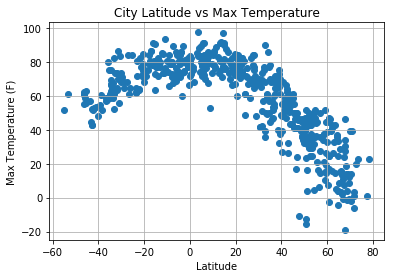

In [36]:
# Lat vs Max Temp plot


plt.scatter(new_cities_df['Lat'], new_cities_df['Max Temp (F)'])

plt.grid()
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Save image
plt.savefig("Latitude_vs_Max_Temp.png")

#### Latitude vs. Humidity Plot

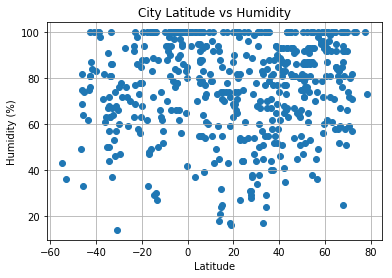

In [35]:
# Latitude vs Humidity

plt.scatter(new_cities_df['Lat'], new_cities_df['Humidity'])

plt.grid()
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save image
plt.savefig("Latitude_vs_Humidity.png")

#### Latitude vs. Cloudiness Plot

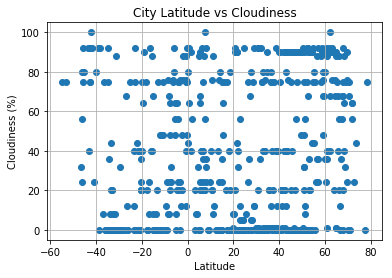

In [34]:
# Latitude vs Cloudiness

plt.scatter(new_cities_df['Lat'], new_cities_df['Cloudiness'])

plt.grid()
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save image
plt.savefig("Latitude_vs_Cloudiness.png")

#### Latitude vs. Wind Speed Plot

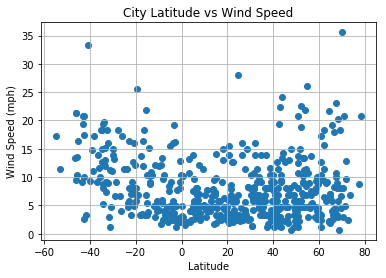

In [33]:
# Latitude vs Wind Speed
plt.scatter(new_cities_df['Lat'], new_cities_df['Wind Speed (MPH)'])

plt.grid()
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save image
plt.savefig("Latitude_vs_Wind_Speed.png")